# <center> Bài tập Thực hành môn Khai phá Dữ liệu </center>

### **Họ và tên:** Huỳnh Nguyễn Thế Dân
### **MSSV:** 21110256
### **Lớp:** 21TTH1

##  1. SVM với tập dữ liệu tách rời tuyến tính

### - Import thư viện

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC # "Support vector classifier"
plt.style.use('seaborn-v0_8-white')
from scipy import stats
from ipywidgets import interact, fixed
from sklearn.datasets import make_blobs


### - Khởi tạo tập dữ liệu có 50 điểm và 2 cụm

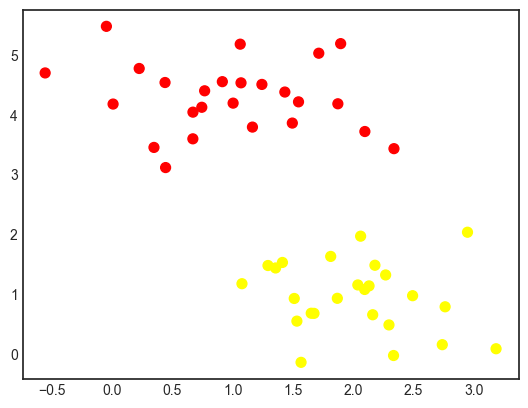

In [3]:
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.show()


### - Vẽ đường thẳng phân tách 2 cụm

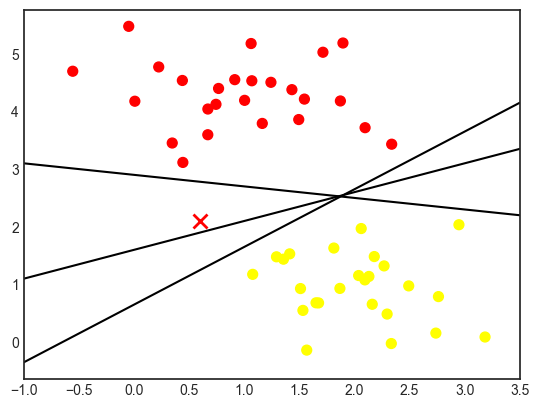

In [4]:
xfit = np.linspace(-1, 3.5)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)
plt.show()


### - Vẽ siêu phẳng lề lớn nhất


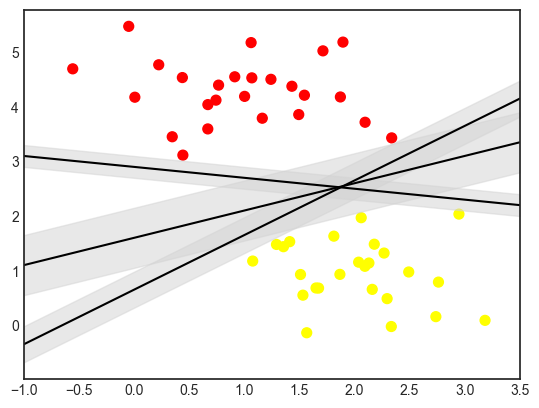

In [5]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='lightgray', alpha=0.5)

plt.xlim(-1, 3.5)
plt.show()


### - Sử dụng support vector classifier (SVC) của Scikit-Learn để huấn luyện mô hình SVM và vẽ các biên quyết định của SVM

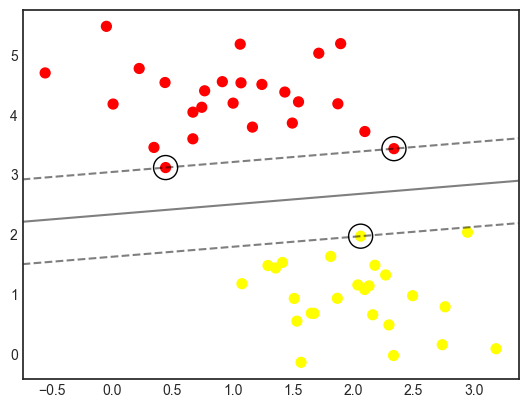

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

In [6]:
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, edgecolors='black',
                   facecolors='none')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)
plt.show()

model.support_vectors_


## 2. SVM với tập dữ liệu không tuyến tính

### - Khởi tạo tập dữ liệu có 50 điểm.


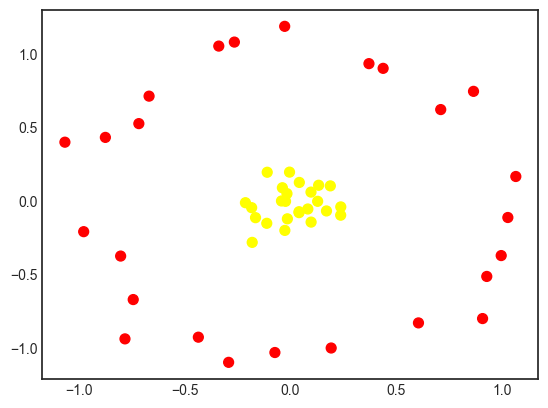

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC # "Support vector classifier"
plt.style.use('seaborn-v0_8-white')
from scipy import stats
from ipywidgets import interact, fixed
from sklearn.datasets import make_blobs, make_circles
from mpl_toolkits import mplot3d

X, y = make_circles(50, factor=.1, noise=.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.show()


### - Sử dụng hàm radial basis function và vẽ dữ liệu trong không gian 3 chiều


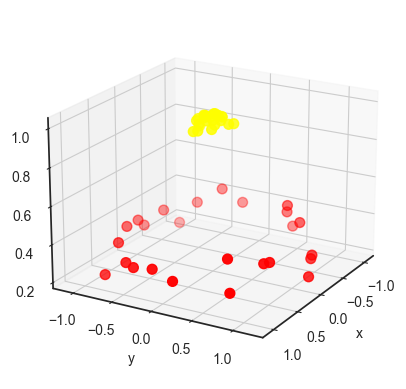

In [8]:
r = np.exp(-(X ** 2).sum(1))
ax = plt.subplot(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
ax.view_init(elev=20, azim=30)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r')
plt.show()


### - Sử dụng support vector classifier (SVC) của Scikit-Learn để huấn luyện mô hình SVM và vẽ các biên quyết định của SVM

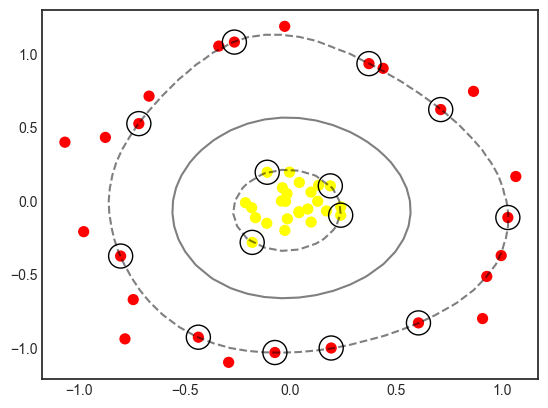

array([[ 1.02575747, -0.11248843],
       [ 0.3702827 ,  0.9342889 ],
       [ 0.60395048, -0.82955793],
       [-0.80148106, -0.37483106],
       [-0.07355052, -1.0310668 ],
       [-0.2647703 ,  1.08094321],
       [-0.71556155,  0.52626293],
       [ 0.19204695, -1.00038378],
       [ 0.70897098,  0.62179508],
       [-0.43477739, -0.92678664],
       [ 0.18802554,  0.10272117],
       [-0.10980777,  0.19538107],
       [ 0.23692692, -0.09681953],
       [-0.18066283, -0.28173758]])

In [9]:
model = SVC(kernel='rbf', C=1E6)
model.fit(X, y)

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, edgecolors='black',
                   facecolors='none')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)
plt.show()

model.support_vectors_


## 3. Áp dụng với tập dữ liệu banknote authentication từ UCI Machine Learning Repository. Kiểm tra banknote là tuyến tính hay không tuyến tính rồi áp dụng tương tự trường hợp tương ứng như trên.

   Variance  Skewness  Curtosis  Entropy  Class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


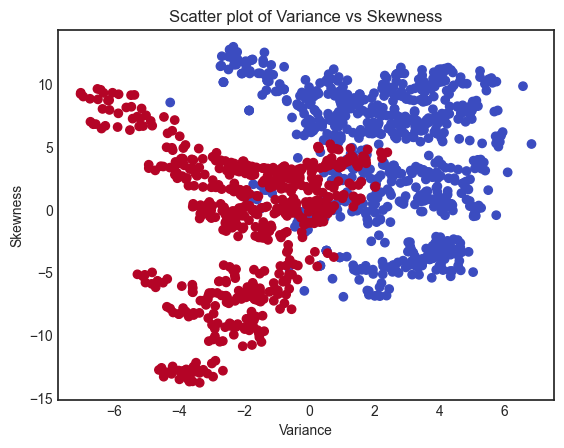

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Bước 1: Tải dữ liệu
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
data = pd.read_csv(url, header=None, names=['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class'])

# Hiển thị một số hàng đầu tiên của dữ liệu
print(data.head())

# Bước 2: Kiểm tra tính tuyến tính
plt.scatter( data['Variance'], data['Skewness'], c=data['Class'], cmap='coolwarm')
plt.xlabel('Variance')
plt.ylabel('Skewness')
plt.title('Scatter plot of Variance vs Skewness')
plt.show()


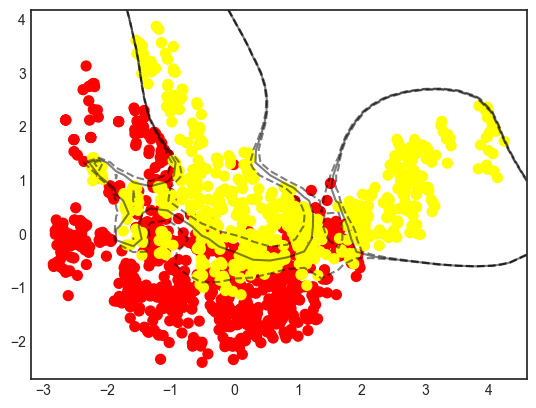

array([[ 1.19341594e+00,  2.46536664e-02],
       [ 1.92137618e+00, -4.42153101e-01],
       [-1.25787420e+00, -3.96475476e-01],
       [-9.58679069e-01,  1.17962292e+00],
       [-1.34166468e-01, -1.15944488e+00],
       [ 6.20875027e-01, -5.28398552e-01],
       [ 1.19341944e+00,  2.46642879e-02],
       [ 1.25336907e+00, -2.56434805e-01],
       [-1.00090203e+00,  1.07124624e+00],
       [ 1.03906771e+00, -1.19562236e-01],
       [ 3.07581176e-01, -7.06391729e-01],
       [-1.16629255e+00,  3.49602222e-01],
       [-1.06608220e-01, -4.55288483e-01],
       [ 1.95289922e-01, -6.41851237e-01],
       [-2.09610694e-01, -1.90275167e-01],
       [ 4.07101188e-01, -6.63887257e-01],
       [ 1.01330409e-01, -9.49505593e-01],
       [-1.30611742e+00,  4.35926471e-01],
       [-1.55763871e-01, -1.00061698e+00],
       [-2.83655627e-01,  9.56818975e-03],
       [-6.06034353e-01, -1.25346453e-02],
       [ 3.81030116e-01, -7.12868830e-01],
       [-1.32701696e+00,  1.48054766e-01],
       [-4.

In [12]:
# Bước 3: Áp dụng SVM
# Tách dữ liệu thành tập huấn luyện và tập kiểm tra
X = data[['Variance', 'Skewness', 'Curtosis', 'Entropy']]
y = data['Class']

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Sử dụng PCA để giảm chiều dữ liệu xuống còn 2 chiều để trực quan hóa
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# SVM với kernel RBF
svm_model = SVC(kernel='rbf', C=1E6, gamma='scale')
svm_model.fit(X_pca, y)

# Vẽ biên quyết định
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # # plot support vectors
    # if plot_support:
    #     ax.scatter(model.support_vectors_[:, 0],
    #                model.support_vectors_[:, 1],
    #                s=300, linewidth=1, edgecolors='black',
    #                facecolors='none')
    # ax.set_xlim(xlim)
    # ax.set_ylim(ylim)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(svm_model)
plt.show()

svm_model.support_vectors_